## NumPy

#### 주요 포인트: 수를 다루는 라이브러리

In [14]:
import numpy as np

t = np.linspace(1,20,10)
t

array([ 1.        ,  3.11111111,  5.22222222,  7.33333333,  9.44444444,
       11.55555556, 13.66666667, 15.77777778, 17.88888889, 20.        ])

## Matplotlib

#### 주요 포인트: 시각화 지원 라이브러리

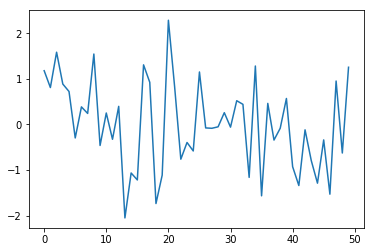

In [2]:
#필요 라이브러리 정의
import numpy as np
import matplotlib.pyplot as plt

# 커맨드뷰에서 차트 시여
%matplotlib inline
# 팝업 창 활용하여 차트 시연
# %matplotlib tk
size = 50
#사이즈만큰 랜덤한 데이터 생성 (정규분포: 평균0, 표준편차1)
y=np.random.standard_normal(size)
x=range(size)
plt.plot(x,y)
plt.show()

## Pandas

#### 주요 포인트: 데이터프레임 핸들링 라이브러리

2018-06-27


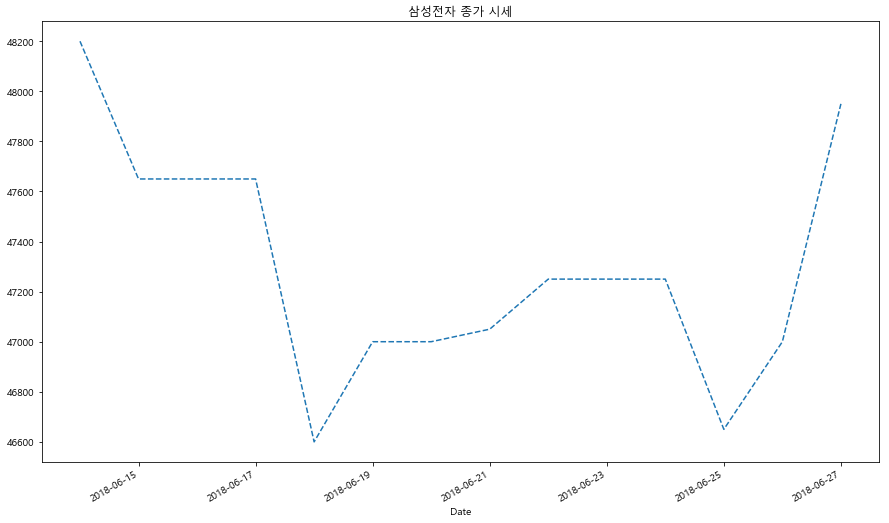

chart ok


In [11]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
start = date.today() - timedelta(14)
yesterday = date.today() - timedelta(1)
print(yesterday)
SEC = web.DataReader("005930", start, yesterday)
SEC['Close'].plot(style='--')
plt.title('삼성전자 종가 시세')
plt.show()

print("chart ok")

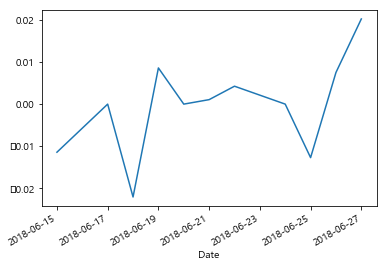

In [12]:
returns = SEC['Close'].pct_change()
returns.plot()

### 주식종목리스트 스크랩

In [15]:
import urllib.parse
import pandas as pd

MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'kind.krx.co.kr/corpgeneral/corpList.do'

def download_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        params['marketType'] = MARKET_CODE_DICT[market]

    if not delisted:
        params['searchType'] = 13

    params_string = urllib.parse.urlencode(params)
    request_url = urllib.parse.urlunsplit(['http', DOWNLOAD_URL, '', params_string, ''])

    df = pd.read_html(request_url, header=0)[0]
    df.종목코드 = df.종목코드.map('{:06d}'.format)

    return df


kosdaq_stocks = download_stock_codes('kospi')
kosdaq_stocks.head()
kosdaq_stocks.to_csv("d:/kospi.csv", index=False, encoding="utf-8-sig")
#encoding="utf-8-sig"
print(kosdaq_stocks.head())

       회사명    종목코드                         업종  \
0      BYC  001460                   봉제의복 제조업   
1   CJ CGV  079160  영화, 비디오물, 방송프로그램 제작 및 배급업   
2   DB손해보험  005830                        보험업   
3  DGB금융지주  139130                     기타 금융업   
4    DSR제강  069730                  1차 철강 제조업   

                                주요제품         상장일  결산월   대표자명  \
0   메리야스,란제리 제조,도매/건축공사/부동산 임대,분양,공급  1975-06-02  12월  유 중 화   
1                        영화상영,영화관 운영  2004-12-24  12월    서 정   
2          자동차보험,화재보험,해상보험,특종보험,장기보험  1973-06-28  12월    김정남   
3                               지주회사  2011-06-07  12월    김태오   
4  와이어로프,각종 경강선,철선제품,PC강선,아연도 강연선 제조  2003-01-28  12월    홍하종   

                     홈페이지     지역  
0    http://www.byc.co.kr  서울특별시  
1    http://www.cgv.co.kr  서울특별시  
2   http://www.idbins.com  서울특별시  
3  http://www.dgbfg.co.kr  대구광역시  
4  http://www.dsrcorp.com   전라남도  


## 주가정보 가져오기

2018-06-27
             Close    Open    High     Low    Volume  Change
Date                                                        
2018-06-22  437500  419500  445500  415500  344810.0  0.0542
2018-06-24  437500  437500  437500  437500       0.0  0.0000
2018-06-25  420500  438000  438500  418000  165000.0 -0.0389
2018-06-26  416000  410000  419000  400500  217020.0 -0.0107
2018-06-27  418000  413500  426500  413500      20.0  0.0048


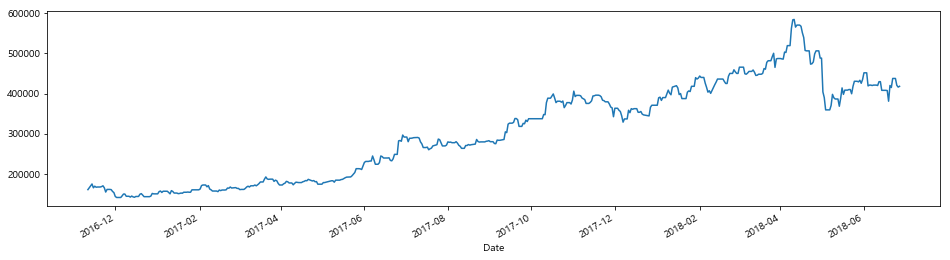

In [26]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
startday = date.today() - timedelta(720)
yesterday = date.today() - timedelta(1)
#startday = '3/14/2014'
#yesterday = '4/14/2016'
print(yesterday)
#GoogleDailyReader??

SEC = web.DataReader("207940", startday, yesterday)
#SEC = web.get_data_yahoo("005930.KS", startday, yesterday)
print(SEC.tail())
SEC['Close'].plot(figsize=(16,4))
plt.show()

In [27]:
#2017년도 3월
SEC['2017-03'].head()

#2017년도 1분기
SEC['2017-01-01':'2017-03-31'].head()

#상반기
SEC[:'2017-06-30'].head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-11-11,161500,149500,186500,142000,8120000.0,0.1215
2016-11-14,175500,165000,177500,165000,2940000.0,0.0867
2016-11-15,166000,179000,181500,162500,2580000.0,-0.0541
2016-11-16,170000,168500,173000,163500,1640000.0,0.0241
2016-11-17,167500,176500,177500,167500,904110.0,-0.0147


###  (2017년도 수정주가 타임시리즈)

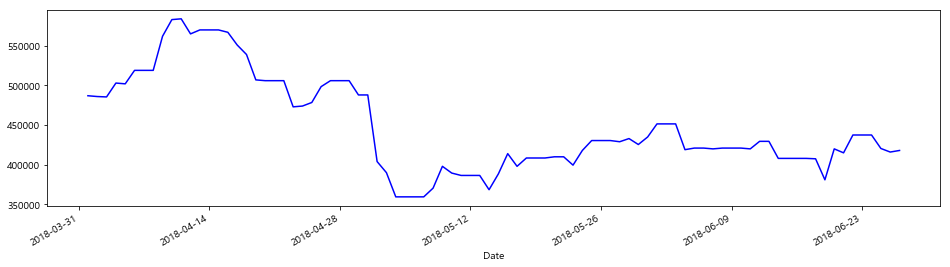

In [32]:
SEC['2018-04-01':'2018-06-27']['Close'].plot(figsize=(16,4), style='b')
plt.show()

### (2017년도 거래량 타임시리즈)

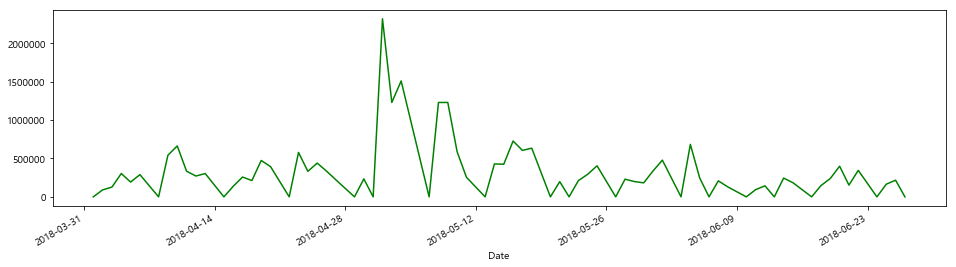

In [33]:
SEC['2018-04-01':'2018-06-27']['Volume'].plot(figsize=(16,4), style='g')
plt.show()

## 수익률 계산

In [40]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
startday = date(2018,4,1)
endday = date(2018,6,27)

SEC = web.DataReader("207940", startday, endday)

SEC = SEC[SEC['Volume'] != 0]
SEC['Close'].head()

# 1 씩 shift
SEC['Close'].shift(1).head()

# 수익률 계산
SEC['Rate'] = np.log( SEC['Close'].astype(float) / SEC['Close'].shift(1).astype(float))
SEC.tail()


,Close,Open,High,Low,Volume,Change,Rate
Date,,,,,,,
2018-06-21,415000,420000,426000,411000,152920.0,-0.0119,-0.011976
2018-06-22,437500,419500,445500,415500,344810.0,0.0542,0.052798
2018-06-25,420500,438000,438500,418000,165000.0,-0.0389,-0.039632
2018-06-26,416000,410000,419000,400500,217020.0,-0.0107,-0.010759
2018-06-27,418000,413500,426500,413500,20.0,0.0048,0.004796


In [39]:
SEC['Close'].shift(1).head()

Date
2018-04-02         NaN
2018-04-03    486000.0
2018-04-04    485500.0
2018-04-05    503000.0
2018-04-06    502000.0
Name: Close, dtype: float64

In [11]:
#SEC = SEC.dropna(axis=0)
SEC.head()

,Open,High,Low,Close,Adj Close,Volume,Rate
Date,,,,,,,
2017-01-02,35980.0,36240.0,35880.0,36100.0,7816.854004,4650600,NaN
2017-01-03,36280.0,36620.0,36020.0,36480.0,7899.136719,7357650,0.010471
2017-01-04,36500.0,36520.0,36100.0,36160.0,7829.846191,7971750,-0.008811
2017-01-05,36060.0,36060.0,35540.0,35560.0,7699.925781,10967450,-0.016732
2017-01-06,36180.0,36440.0,36040.0,36200.0,7838.507324,8880950,0.017838


## 수익률 변동

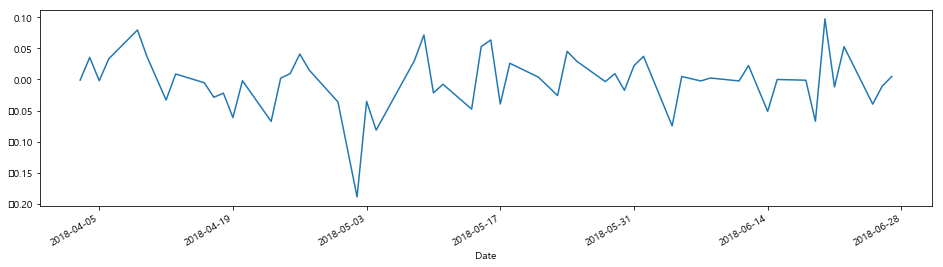

In [41]:
#수익률 변동 계산
#plt.axhline(color='k')
SEC['Rate'].plot(figsize=(16,4))
plt.show()

In [42]:
SEC.describe()

,Close,Open,High,Low,Volume,Change,Rate
count,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,57.000000
mean,450293.103448,450732.758621,463353.448276,440413.793103,4.148622e+05,-0.001631,-0.002644
std,60676.958435,60533.173123,60042.383321,59738.181532,3.946860e+05,0.044595,0.046005
min,359500.000000,357000.000000,384500.000000,350000.000000,2.000000e+01,-0.172100,-0.188901
25%,408125.000000,410125.000000,419500.000000,401000.000000,2.017925e+05,-0.024650,-0.025943
50%,423250.000000,426500.000000,436500.000000,418250.000000,2.918600e+05,-0.001100,-0.001029
75%,495875.000000,498250.000000,504250.000000,485750.000000,4.654075e+05,0.025450,0.026040
max,584000.000000,587000.000000,600000.000000,565000.000000,2.320000e+06,0.102400,0.097455


### (수익률 분포)

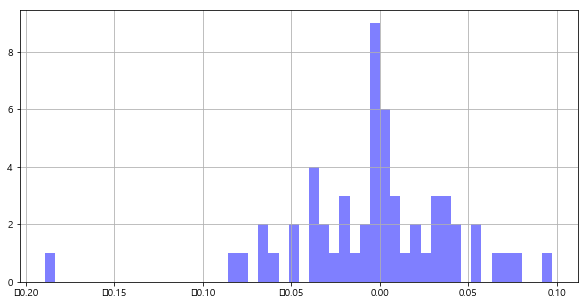

In [43]:
# 수익률의 분포
SEC['Rate'].hist(bins=50, color='b', alpha=0.5, figsize = (10,5))
plt.show()

## 이동평균

In [45]:
SEC['MA_5']=SEC['Close'].rolling(window=5).mean()
SEC['MA_20']=SEC['Close'].rolling(window=20).mean()
SEC['diff']=SEC['MA_5']-SEC['MA_20']
SEC.tail(5)
    

,Close,Open,High,Low,Volume,Change,Rate,MA_5,MA_20,diff
Date,,,,,,,,,,
2018-06-21,415000,420000,426000,411000,152920.0,-0.0119,-0.011976,406300.0,419600.0,-13300.0
2018-06-22,437500,419500,445500,415500,344810.0,0.0542,0.052798,412200.0,421500.0,-9300.0
2018-06-25,420500,438000,438500,418000,165000.0,-0.0389,-0.039632,414800.0,421625.0,-6825.0
2018-06-26,416000,410000,419000,400500,217020.0,-0.0107,-0.010759,421800.0,420900.0,900.0
2018-06-27,418000,413500,426500,413500,20.0,0.0048,0.004796,421400.0,420350.0,1050.0


## 골든크로스, 데드크로스

In [46]:
SEC = SEC[ ['Open','High','Low','Close','Volume','Rate','MA_5','MA_20','diff']]

In [47]:
SEC.tail()

,Open,High,Low,Close,Volume,Rate,MA_5,MA_20,diff
Date,,,,,,,,,
2018-06-21,420000,426000,411000,415000,152920.0,-0.011976,406300.0,419600.0,-13300.0
2018-06-22,419500,445500,415500,437500,344810.0,0.052798,412200.0,421500.0,-9300.0
2018-06-25,438000,438500,418000,420500,165000.0,-0.039632,414800.0,421625.0,-6825.0
2018-06-26,410000,419000,400500,416000,217020.0,-0.010759,421800.0,420900.0,900.0
2018-06-27,413500,426500,413500,418000,20.0,0.004796,421400.0,420350.0,1050.0


In [48]:
pre_key = prev_val = 0
for key,val in SEC['diff'][1:].iteritems():
    if val == 0:
        continue
    if val * prev_val < 0 and val > prev_val:
        print('[golden]', key, val)
    if val * prev_val < 0 and val < prev_val:
        print('[dead]', key, val)
    prev_key, prev_val = key, val

[golden] 2018-05-28 00:00:00 4650.0
[dead] 2018-06-15 00:00:00 -2650.0
[golden] 2018-06-26 00:00:00 900.0


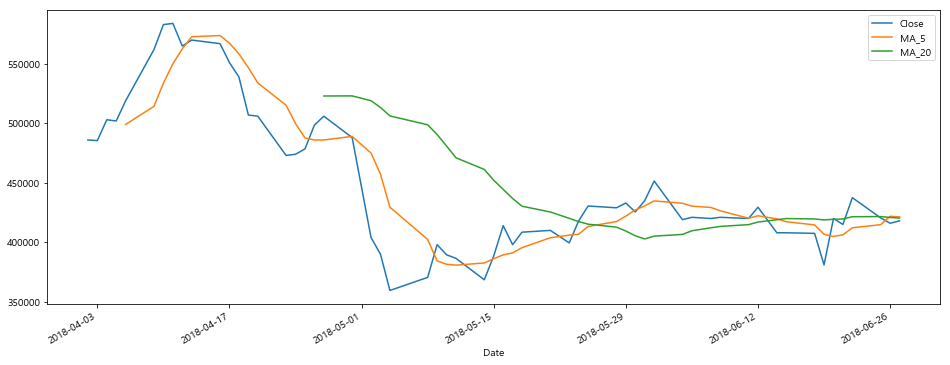

In [49]:
ax=SEC[['Close','MA_5','MA_20']].plot(figsize = (16,6))


In [50]:
SEC.tail()

,Open,High,Low,Close,Volume,Rate,MA_5,MA_20,diff
Date,,,,,,,,,
2018-06-21,420000,426000,411000,415000,152920.0,-0.011976,406300.0,419600.0,-13300.0
2018-06-22,419500,445500,415500,437500,344810.0,0.052798,412200.0,421500.0,-9300.0
2018-06-25,438000,438500,418000,420500,165000.0,-0.039632,414800.0,421625.0,-6825.0
2018-06-26,410000,419000,400500,416000,217020.0,-0.010759,421800.0,420900.0,900.0
2018-06-27,413500,426500,413500,418000,20.0,0.004796,421400.0,420350.0,1050.0


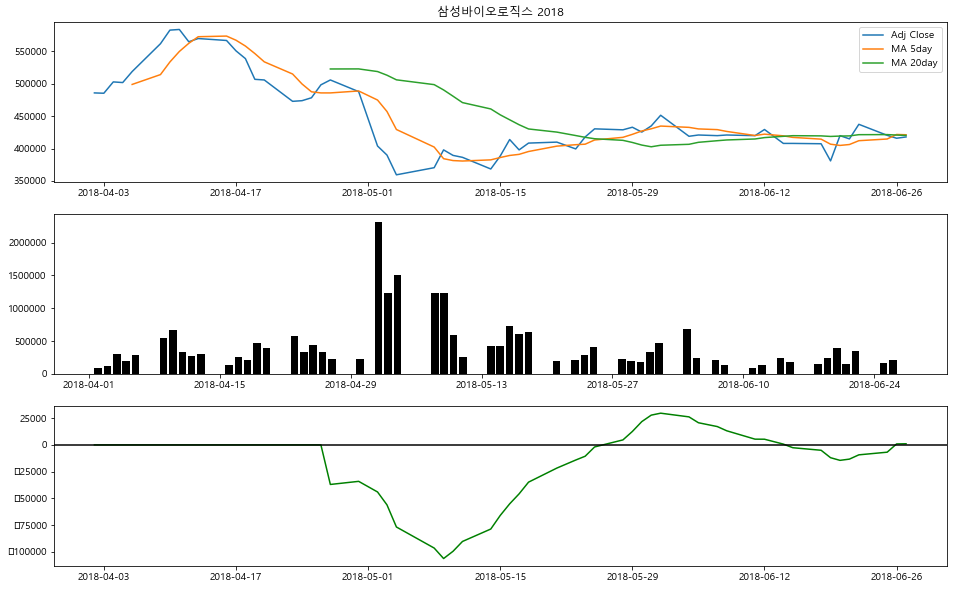

In [53]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(SEC.index, SEC['Close'], label = 'Close')
plt.plot(SEC.index, SEC['MA_5'], label='MA 5day')
plt.plot(SEC.index, SEC['MA_20'], label='MA 20day')
plt.title(u'삼성바이오로직스 2018')
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(SEC.index, SEC['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)
diffChart.plot(SEC.index, SEC['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k')